# **Deliverable 3: v1 Draft Complete Report**
**Deadline: 21 November 2022**




## **Preliminary Information**

### **Deliverable 3 Checklist**

All data should have been collected. All project questions should have been reviewed, answered, and submitted in a written document outlining findings. You will also be asked to submit the associated data and a README explaining what each label/feature in your dataset represents. Your team should meet with the client before this deliverable.

#### **Checklist**
* All data is collected
* Refine the preliminary analysis of the data performed in PD1&2
* Answer another key question
* Attempt to answer overarching project question
* Create a draft of your final report
* Refine project scope and list of limitations with data and potential risks of achieving project goal
* Submit to Gradescope with the above report and modifications to original proposal


#### **Questions to ask**

* What businesses exist? E.g. restaurants, barbershop
* What businesses are over-represented (e.g. within one mile of Codman square there are 30 barber shops)
* What businesses are missing?
* How are businesses doing? Based on cell phone traffic
* How many licenses does a district have compared to other districts?
* How many woman owned or MBE businesses (could be an extension)? How many of the businesses are chains vs. independent operators? 
* How long have businesses been in operation (Sec of State database? Yelp/Googleplaces? Other source of data?) 
* How many commercial vacancies – need to figure out where we might get this data ! MLS, LupeNet? (private sector data sources – ask BU Libraries; Councilor Worrell to reach out to Greater Boston Real Estate Board)

#### **Extension Project**

This is an opportunity to get creative with additional data that you think would tell an interesting story. This extension should be something your team finds compelling. You will create a mid-semester proposal for this extension project that the client will approve. 

These may be helpful datasets or topics to consider, but you are welcome to research other datasets and sources:

**TOPIC:** Business conditions (status/health):
* What is the status of business in the district? Are they doing well, poor, moderate, etc. 
  * Look at commercial vacancies in the district*
    * This should be available per this ordinance: https://www.boston.gov/sites/default/files/file/2021/09/Docket%20%230601.pdf
      * submitted a public disclosure request

**TOPIC:** Covid 19’s impact on small businesses:
* Did any businesses close because of covid? Did any businesses become virtual because of covid? How did they adapt?
* Cross reference from 2019 through 2022 and see what’s closed
* Did any small businesses from D4 receive federal PPP loans: Tracking PPP: Search Every Company Approved for Federal Loans - ProPublica: https://projects.propublica.org/coronavirus/bailouts/
* List of Boston businesses receiving support from Small Business Relief Fund: https://www.boston.gov/departments/economic-development/small-business-relief-fund#_020-recipients
  
**TOPIC:** compare District 4 with another district - look at licenses for restaurants, liquor, etc. and how the business mix varies
* Food establishment license data: https://data.boston.gov/dataset/active-food-establishment-licenses
* Liquor licenses data: https://data.boston.gov/dataset/liquor-licenses
* Cannabis licenses data: https://data.boston.gov/dataset/cannabis-registry
* Various other licenses data: https://data.boston.gov/dataset/licensing-board-licenses

**TOPIC:** Food Delivery:
* Scrape ubereats, postmates, or uber eats to see if they offer delivery service?
  
**TOPIC:** Relationship betweend vulnerability and the type of businesses 
Vulnerability Dataset: https://data.boston.gov/dataset/climate-ready-boston-social-vulnerability


#### **Final Report Requirements**

**Base Project Work:**
* The final deliverable should be a written report that includes the following information: 
  * Visualizations and dashboards of key findings
  * Answers to all client questions
  * Dataset containing a list of all businesses for D4, ownership details, cell phone traffic, and other relevant data for businesses

**Extension Project Work:**
* Analysis of the datasets including visualizations of key findings
* Answers to the questions you included on proposal document (if you were unable to answer a question, indicate that)

## **Preliminary Data Analysis**

In [3]:
#importing required libraries
import pandas as pd
import folium 

### **Main Streets Business Data**
First, we can examine the covariates and their relation to examine any patterns

In [32]:
mainstreets_df = pd.read_csv('../datasets/MainStreets_Business_List.csv')

# #checking the data
mainstreets_df.head()

,Unnamed: 0,latitude,longitude,business_name,street_address,ZIP_code,NAICS_2017_6digit_code,NAICS_2017_6digit_desc,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet
0,1,42.349398,-71.154065,zisis convenience store,375 Washington St,2135,452319,All Other General Merchandise Stores,45,Retail Trade,1,1 to 9,Brighton
1,2,42.350387,-71.165135,ziggy's,583 Washington St,2135,0,,99,Undefined,0,Not Available,Brighton
2,3,42.349219,-71.151769,zen zone acupuncture & spa,319 Washington St,2135,621399,Offices of All Other Miscellaneous Health Prac...,62,Healthcare and Social Assistance,2,1 to 9,Brighton
3,4,42.349465,-71.153117,yes nails & spa inc,416 Market St,2135,812113,Nail Salons,81,Other Services,3,1 to 9,Brighton
4,5,42.349453,-71.151543,xfinity,12 Wirt St,2135,515210,Cable and Other Subscription Programming,51,Information,13,10 to 24,Brighton


#### **Looking into Business Type Popularity**
We decided to investigate what business types are the most popular among the small businesses in the Boston area

<AxesSubplot: title={'center': 'Number of Businesses Types in Boston'}, xlabel='Business Type', ylabel='Count'>

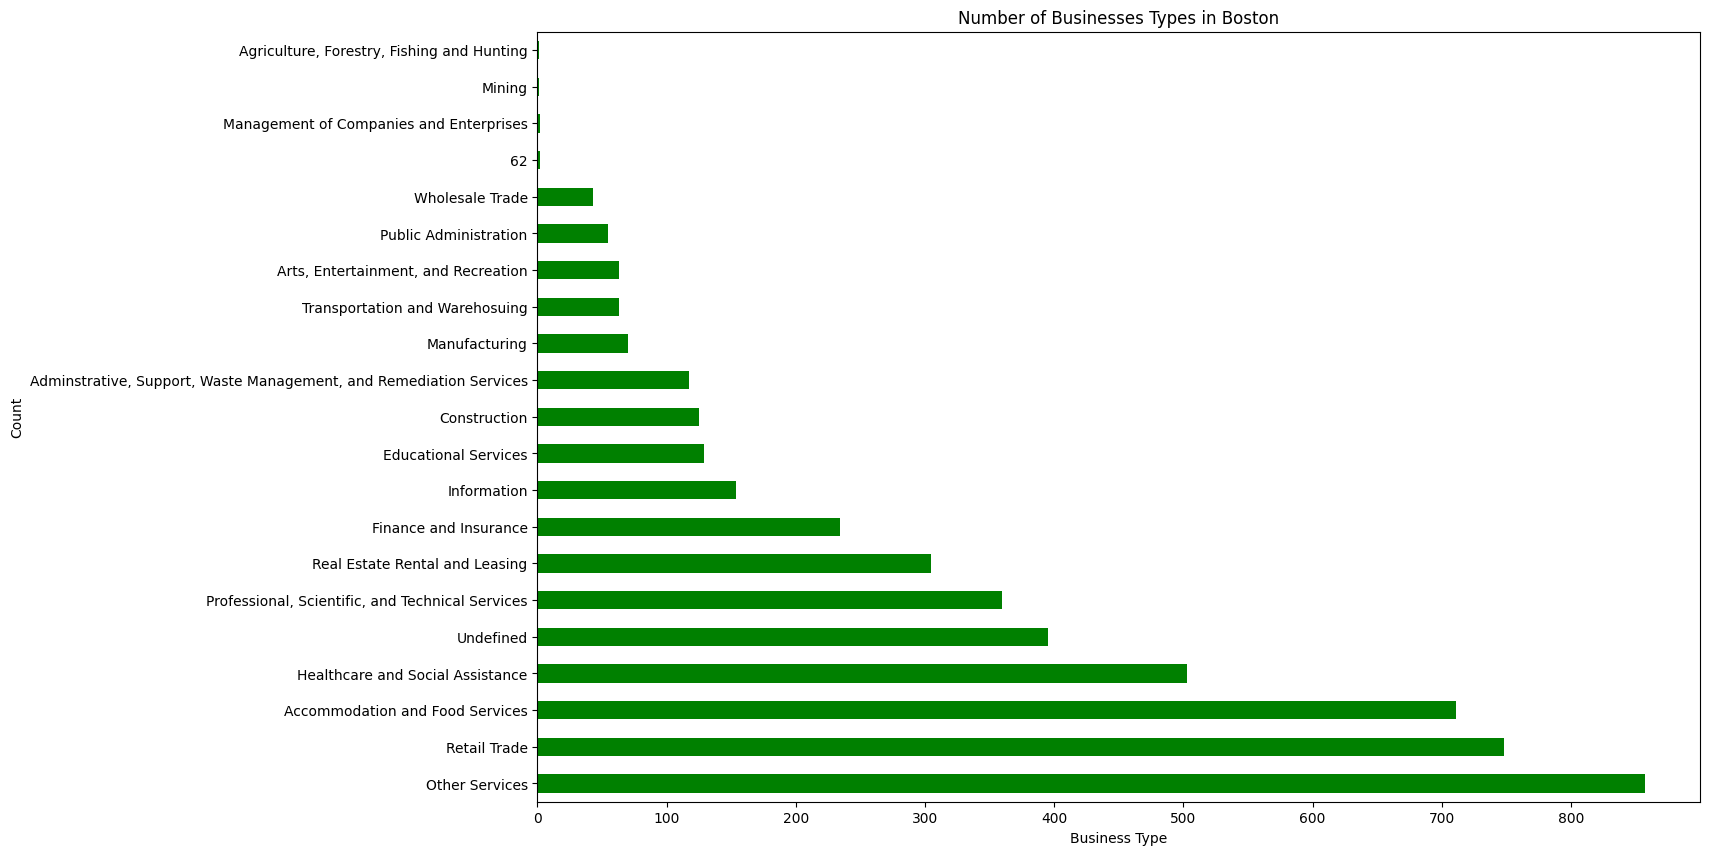

In [5]:
#plot the number of businesses type in boston by its count in descending order
mainstreets_df.groupby("NAICS_2017_2digit_desc")["NAICS_2017_2digit_desc"].count().sort_values(ascending=False).plot.barh(
    title = "Number of Businesses Types in Boston",
    color = "green",
    ylabel = "Count",
    xlabel = "Business Type",
    figsize = (15,10),
    rot = 0    
)

> We can see here that `Retail Trade`, `Food services` and `Healthcare` appear to be the most popular. When it comes to promoting small businesses to relocate to this city, we can focus on these top business groups, as these appear to be more popular and larger in number. Hence, by attracting these business types, we can proportionally attract more businesses.
> 
> In contrast, we can also focus on the smaller ones and tell these small businesses that they could play a huge role in the Boston area if they decide to move here. For example, if there is no plumbing in the city, we should definitely have a plumber since that would help a ton.

We felt these the names `Retail Trade` was a bit too ambiguous, so we went forward with investigating the larger descriptions, `NAICS_2017_6digit_desc`. As these descriptions are larger, plotting them would result in too many elements. Hence, we will only display the top 10.

In [6]:
mainstreets_df.groupby("NAICS_2017_6digit_desc")["NAICS_2017_6digit_desc"].count().sort_values(ascending=False).head(10)

NAICS_2017_6digit_desc
Full-Service Restaurants                                    608
                                                            395
Offices of Real Estate Agents and Brokers                   209
Beauty Salons                                               208
Religious Organizations                                     109
Other Social Advocacy Organizations                         109
Offices of Lawyers                                          102
Barber Shops                                                 86
Offices of Physicians (except Mental Health Specialists)     78
Offices of Dentists                                          73
Name: NAICS_2017_6digit_desc, dtype: int64

> We noticed that `full-service restaurants`, `real estate`, and `beauty salons` are quite prevalent, so we will later investigate how densely close they are in terms of location.

#### **Looking at employment numbers**
We believe it could be insightful to view businesses' employment number by location, but first we will look at the number of employees, or the `employment_buckets`.

<AxesSubplot: title={'center': 'Employment Buckets in Boston'}, xlabel='Employment Buckets', ylabel='Count'>

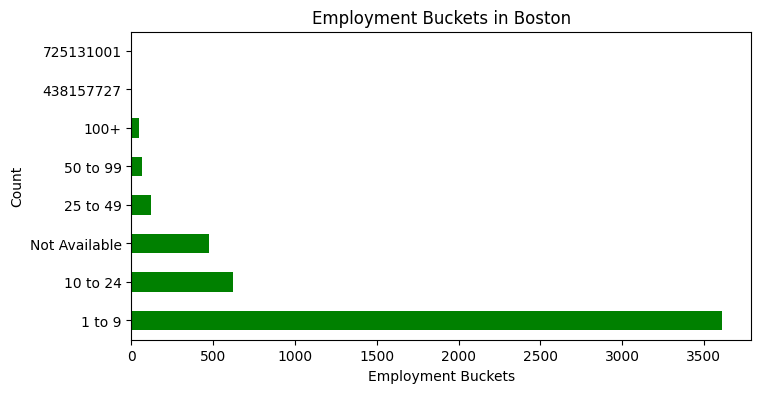

In [7]:
mainstreets_df.groupby("employment_buckets")["employment_buckets"].count().sort_values(ascending=False).plot.barh(
    title = "Employment Buckets in Boston",
    color = "green",
    ylabel = "Count",
    xlabel = "Employment Buckets",
    figsize = (8,4),
)

> We notice that the dataset has a lot of businesses centered around `1-9` employees. We can potentially focus on this `1-9` bucket and view it by location.

#### **Looking at Street Name**
Our team believes looking at the Street Name (`street_address`) by the business type (`NAICS_2017_6digit_desc`) could be insightful because small businesses could potentially gain attraction and popularity by relocating to a specific street.  

First, we will look at how dense a street name is in terms of number of small businesses

C:\Users\resha\AppData\Local\Temp\ipykernel_62024\4104173475.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  mainstreets_df['street_name'] = mainstreets_df['street_address'].str.split(' ', 2).str[1]


<AxesSubplot: title={'center': 'Number of Businesses by Street Name'}, xlabel='Count', ylabel='Street Name'>

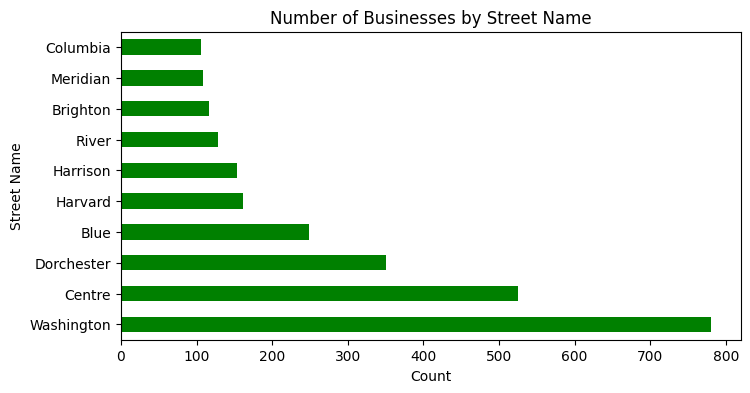

In [8]:
#create street_name column that gets the second word from street_address
mainstreets_df['street_name'] = mainstreets_df['street_address'].str.split(' ', 2).str[1]


#plot the number of businesses by street_name
mainstreets_df.groupby("street_name")["street_name"].count().sort_values(ascending=False).head(10).plot.barh(
    title = "Number of Businesses by Street Name",
    color = "green",
    xlabel = "Count",
    ylabel = "Street Name",
    figsize = (8,4)
)

> We found it very peculiar that a single street like `Washington` can have up to about 800 businesses on it. We later googled the street to find that it is about 37 miles, so maybe street name is not a great indicator. However, it would have been interesting if we computed the density of how many businesses per mile, but we decided that looking at the `latitude` and `longitude` can be more insightful.

To do (Aaron):
1. Answer 
    * What businesses are over-represented (e.g. within one mile of Codman square there are 30 barber shops)
    * What businesses are missing?
    * How are businesses doing? Based on cell phone traffic
2. Write report (Simon/Reshab)
    * Do it by Sunday night 

#### **Looking at Latitude and Longitude**
We believe this is the key indicator to view what small businesses are overrepresented. To begin, for our preliminary, we will simply graph the latitude and longitude of each small business in Boston. We will also have the districts colored for better visualization.

In [20]:
#plot every business on a map

def create_map(df):
    return folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=13, tiles='CartoDB positron')

def plot_businesses(df):
    for i in range(df.shape[0]):
        folium.CircleMarker(
            [df.iloc[i]['latitude'], df.iloc[i]['longitude']],
            opacity=0.7,
            color='green',
            radius=3,
            fillColor='red',
            fill=True,
        ).add_to(map)
    return map

In [30]:
#Plotting district areas

import geopandas as gpd

districts = gpd.read_file('./City_Council_Districts_View.geojson')

def plot_district_areas(df):
    for _, r in df.iterrows():
        # Without simplifying the representation of each borough,
        # the map might not be displayed
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        
        #add color to district 4
        if r['DISTRICT'] == 4:
            geo_j = folium.GeoJson(data=geo_j,
                            style_function=lambda x: {'fillColor': 'green'})

        else:
            geo_j = folium.GeoJson(data=geo_j,
                            style_function=lambda x: {'fillColor': 'orange'})


        folium.Popup(r['DISTRICT']).add_to(geo_j)
        geo_j.add_to(map)

In [31]:
#plotting the map
map = create_map(mainstreets_df)
plot_businesses(mainstreets_df)
plot_district_areas(districts)

map

> We have District 4 area plotted in `green`, and se notice that small businesses are primaryly located on 2 streets. We hope to further investigate which businesses they are and which ones are over or underrepresented. We also hope to narrow down the datasets by whether they are in District 4, as we see that other businesses are being plotted.

#### **Looking at Mainstreet**

Our group thought, similar to street name, that the `mainstreet` could be important to small businesses, as maybe they can relocate their business here based on traffic. To begin, we will plot `mainstreet` by count. _We hope to narrow this down to only District 4 later on and look into business types_.

<AxesSubplot: title={'center': 'Number of Businesses by Mainstreet'}, xlabel='Count', ylabel='Mainstreet'>

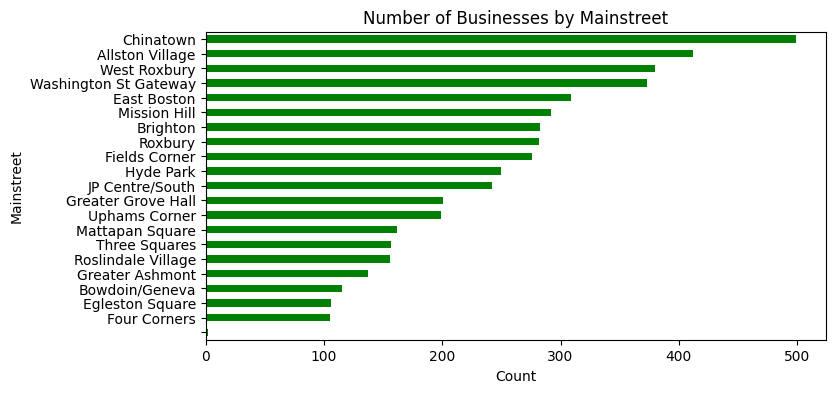

In [34]:
#plot mainstreet businesses by count
mainstreets_df.groupby("mainstreet")["mainstreet"].count().sort_values(ascending=True).plot.barh(
    title = "Number of Businesses by Mainstreet",
    color = "green",
    xlabel = "Count",
    ylabel = "Mainstreet",
    figsize = (8,4)
)

> Chinatown appeared to be on top, but this is not district 4. The goal here though was to see if large numbers occur, which there seems to be. Once again, we hope to narrow our data down to district 4 to further investigate.